In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#import catboost
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [201]:
#reading df
df = pd.read_csv('no_outlier_df.csv',index_col='id')
df.head()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,address,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
id,,,,,,,,,,,,,,,,,,,,,
bproperty-14087,1100.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/80...,3.0,3.0,22000.0,1150 Square Feet Apartment For Rent In Mohamma...,The apartment of 1100 Square Feet is located ...,https://www.bproperty.com/en/property/details-...,...,"Shyamoli Housing, Shekhertek",0,2,2,0,5,0,4,Dhaka,Mohammadpur
bproperty-14091,1300.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/13...,3.0,3.0,40000.0,Grab This Lovely Flat For Rent In Bashundhara ...,This lovely apartment is located in a great lo...,https://www.bproperty.com/en/property/details-...,...,Block D,0,2,2,0,4,0,5,Dhaka,Bashundhara R/A
bproperty-14092,1500.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,35000.0,1500 Square Feet Apartment With Necessary Resi...,"Make this beautiful 1,500 Sft apartment in Utt...",https://www.bproperty.com/en/property/details-...,...,Sector 4,0,1,3,2,2,0,4,Dhaka,Uttara
bproperty-14093,1350.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000.0,Wow! This 1350 Sq Ft Apartment For Rent In Bas...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,...,Block K,0,0,0,0,4,0,3,Dhaka,Bashundhara R/A
bproperty-14094,1825.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,60000.0,This 1825 Sq. Ft Apartment Will Ensure Your Go...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,...,Sector 9,0,2,1,0,3,0,4,Dhaka,Uttara


# Feautre Engineering

In [164]:
#setting out amenities to simplify the dataset and taking on important columns
amenity_col = list(df.filter(like='amenity').columns)
not_required_cols = ['property_description', 'property_overview', 'property_url', 'image_url']
df.drop(columns=not_required_cols,inplace=True,axis=1)
df.isna().sum()

area                                        0
building_type                               0
building_nature                             0
num_bath_rooms                              0
num_bed_rooms                               0
price                                       0
purpose                                     0
city                                        0
locality                                    0
address                                  4680
relaxation_amenity_count                    0
security_amenity_count                      0
maintenance_or_cleaning_amenity_count       0
social_amenity_count                        0
expendable_amenity_count                    0
service_staff_amenity_count                 0
unclassify_amenity_count                    0
division                                    1
zone                                       80
dtype: int64

Now I am going to modify each feature using the insights given in task#3 EDA

### area

In [165]:
df['area'].describe()
#nothing to do here

count    29813.000000
mean      1657.573696
std       1215.077508
min         93.000000
25%       1050.000000
50%       1350.000000
75%       2000.000000
max      17000.000000
Name: area, dtype: float64

### building_type

1. Nearly 80% of our properties are `Apartment`, for a total of nearly 27000 samples. We also some `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`, whose number are under 10% of the total dataset; that is to say, their numbers are under 2500. 
2. There are other types of properties, in a very negligible number.

❗ **Recommendation**:
* We are expecting our future models to perform well on `Apartment`, and to have and acceptable result for `Office`, `Building`, `Shop`, `Floor`, `Residential Plot`. They are expected to perform poorly on other types of properties.
* Types not part of (1) should be dropped in order to avoid noise in our future models.


In [166]:
req_building_type = ['Apartment','Office', 'Building', 'Shop', 'Floor', 'Residential Plot']
df = df[df['building_type'].isin(req_building_type)]

### building_nature

In [167]:
df['building_nature'].describe()
#nothing to do here

count           29637
unique              2
top       Residential
freq            23985
Name: building_nature, dtype: object

### num_bath_rooms & num_bed_rooms

In [168]:
df[['num_bath_rooms','num_bed_rooms']].describe()
#nothing to do here

,num_bath_rooms,num_bed_rooms
count,29637.000000,29637.000000
mean,1.660694,2.316800
std,1.551060,1.268307
min,0.000000,0.000000
25%,0.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,3.000000
max,10.000000,10.000000


### price

In [169]:
df['price'].describe()
#non-linear relation was observed with every feature
#nothing to do here

count    2.963700e+04
mean     3.572601e+06
std      5.929573e+06
min      4.200000e+03
25%      2.500000e+04
50%      1.300000e+05
75%      6.000000e+06
max      1.200000e+08
Name: price, dtype: float64

### purpose

In [170]:
#nothing to do here
df['purpose'].describe()

count     29637
unique        2
top        Rent
freq      17727
Name: purpose, dtype: object

### city

1. Most of our properties are in `Dhaka`, for a total of nearly 28,000 properties. We also have nearly 4000 properties in `Chattogram`.     
1. A negligible amount of properties are in `Narayanganj City`, `Barishal`, `Gazipur`, each of them with a count below 500 properties ..
1. As for the other cities, their properties count is too insignificant.

❗ **Recommendation**:
* We are expecting our future models not to be perform well on cities mentioned in (2). We should consider dropping samples with those cities when building models since their low number will make it so that the models will not predict well on them. 
* Cities not part of (1) and (2) should definitively be dropped in order to avoid noise in our future models.

In [171]:
req_city = ['Dhaka','Chattogram','Narayanganj City', 'Barishal','Gazipur']
df = df[df['city'].isin(req_city)]
df.shape

(29346, 19)

### locality

In [172]:
#nothing to do here
df['locality'].describe()

count      29346
unique       160
top       Mirpur
freq        4966
Name: locality, dtype: object

### address

In [173]:
df['address'].value_counts()[:30].values
#there is error, bangladesh should not be included in a address

array([12731,   413,   212,   193,   184,   173,   164,   153,   152,
         150,   147,   141,   139,   139,   139,   127,   123,   120,
         119,   114,   111,   109,   108,   106,   105,   103,   101,
         100,    99,    99], dtype=int64)

In [174]:
df.replace('Bangladesh',np.nan, inplace=True)


In [175]:
len(df['address'].unique())

778

In [176]:
df['address'].isna().sum()

17350

In [177]:
#this feature doesn't see like a meaningfull for price prediction better droping as it may cause high dimensionality 
df.drop(columns='address', inplace=True)

### divison

In [178]:
df['division'].value_counts()
#nothing to do here

Dhaka         25780
Chattogram     3344
Barisal         222
Name: division, dtype: int64

### zone

In [179]:
df['zone'].isnull().sum()

80

In [180]:
df[df['zone'].isna()]['division'].value_counts()
#all missing zones belong to dhaka

Dhaka    80
Name: division, dtype: int64

In [181]:
#it won't be wrong to fill them with mode
df['zone'].fillna(df['zone'].mode(), inplace=True)

### Data Splitting

In [182]:
X = df.drop(columns='price', axis=1)
y = df['price']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Handling Categorical Columns

It is observed that locality and zone have high no. of unique features.

Therefore, a distinct technique will be employed to handle features with fewer than 10 unique values as compared to those with more than 10.

=> using OneHotEncoder/get_dummies for less than 10 

=> using CatBoost encoding for greater than 10


In [184]:
#dividing the columns based on no. of unique values

cat_cols = list(X_train.select_dtypes(include=['object']).columns)
num_cols = list(X_train.select_dtypes(include='number').columns)
number_cols = [item for item in num_cols if item not in amenity_col]
large_cat = ['zone', 'locality']
small_cat = [item for item in cat_cols if item not in large_cat]

#### catboost transformer (large features)

In [185]:
#large_cat columns encoded
cat_boost_encoder = ce.CatBoostEncoder()
cat_boost_encoder.fit(X_train[large_cat],y_train)

CatBoostEncoder(cols=['zone', 'locality'])

### Feature Scaling

#### standardscaler transformer

In [186]:
s_scaler = StandardScaler()
s_scaler.fit(X_train[number_cols])

StandardScaler()

### Custom Transformers

In [187]:
from sklearn.base import BaseEstimator, TransformerMixin
    
class LargeFeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    def fit(self, X=None, y=None):
        return self
    def transform(self, df):
        df[['encoded_zone', 'encoded_locality']] = cat_boost_encoder.transform(df)
        df = df.drop(columns=['zone','locality'], axis=1)
        return df

class PassAmenityColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    def fit(self, X=None, y=None):
        return self
    def transform(self, df):
        return df

### Pipelines

In [188]:
from sklearn.pipeline import Pipeline

large_encoding_pipeline = Pipeline([
    ('large_cat_encoder', LargeFeatureEncoder()) 
])
pass_amenity_pipeline = Pipeline([
    ('amenities', PassAmenityColumns())
])
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

### Columns Transformer

In [189]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('small_encoding', OneHotEncoder(sparse=False), small_cat),
    ('large_encoding', large_encoding_pipeline, large_cat),
    ('amenities', pass_amenity_pipeline, amenity_col),
    ('scaling', scaling_pipeline, number_cols)
    
])

In [190]:
prepared_x_train = full_pipeline.fit_transform(X_train)

In [191]:
prepared_x_train[1]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.26022124e+06, 1.29105774e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.54116276e-01,
       1.51062849e+00, 5.40242501e-01])

columns encoded_zone and encoded_locality doesn't see to be standarized, must be fixed for better performance

In [192]:
prepared_x_train.shape

(23476, 30)

# Model Development


## Linear Regression

In [193]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_x_train, y_train)

LinearRegression()

In [194]:
from sklearn.metrics import mean_squared_error
lin_predictions = lin_reg.predict(prepared_x_train)
lr_mse = mean_squared_error(y_train,lin_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

3756774.5760178086

## DecisionTreeRegressor

In [195]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(prepared_x_train, y_train)

DecisionTreeRegressor()

In [196]:
dt_predictions = dt_reg.predict(prepared_x_train)
dt_mse = mean_squared_error(y_train,dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

387451.70527334244

## RandomForestRegressor

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(prepared_x_train, y_train)

RandomForestRegressor()

In [198]:
rf_predictions = rf_reg.predict(prepared_x_train)
rf_mse = mean_squared_error(y_train,rf_predictions)
rf_rmse = np.sqrt(dt_mse)
rf_rmse

387451.70527334244

##### predicting x_test

In [199]:
prepared_x_test = full_pipeline.transform(X_test)
test_prediction = rf_reg.predict(prepared_x_test)
test_mse = mean_squared_error(y_test, test_prediction)
test_rmse = np.sqrt(test_mse)
test_rmse

1699764.2069906117

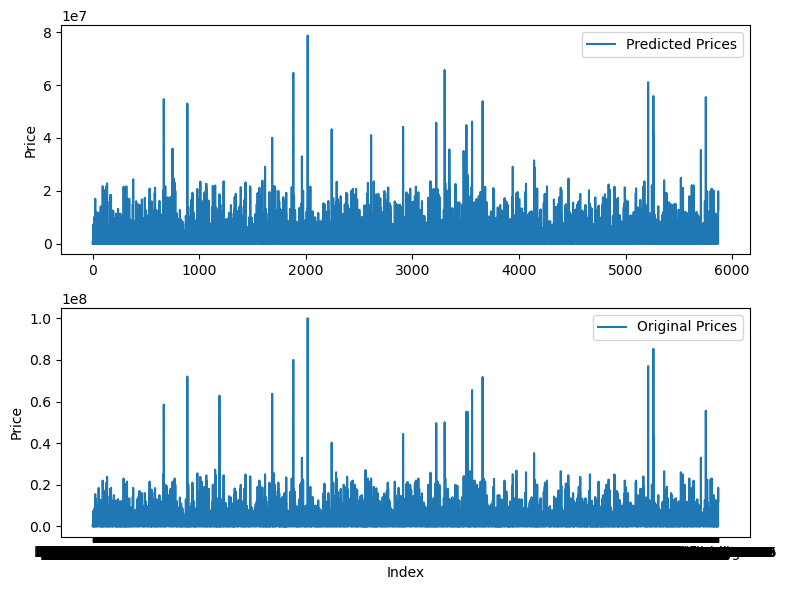

In [200]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plotting the predicted prices
axs[0].plot(test_prediction, label='Predicted Prices')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plotting the original prices
axs[1].plot(y_test, label='Original Prices')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Price')
axs[1].legend()

plt.tight_layout()
plt.show()

### HyperParameter Tuning

In [203]:
#to be done